In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from numpy import loadtxt
%matplotlib inline

In [2]:
"""
#Create a list of the fileNames
fileNames = ['listings_1.csv','listings_2.csv','listings_3.csv','listings_4.csv','listings_5.csv','listings_6.csv','listings_7.csv',
            'listings_8.csv','listings_9.csv','listings_10.csv','listings_11.csv','listings_12.csv']
cols = ['id','host_response_rate','host_is_superhost','host_identity_verified','cancellation_policy','instant_bookable','number_of_bookings']

#Create a list of the globalDataframe that will store the final values
finalDF = pd.DataFrame(columns=cols)
"""

"\n#Create a list of the fileNames\nfileNames = ['listings_1.csv','listings_2.csv','listings_3.csv','listings_4.csv','listings_5.csv','listings_6.csv','listings_7.csv',\n            'listings_8.csv','listings_9.csv','listings_10.csv','listings_11.csv','listings_12.csv']\ncols = ['id','host_response_rate','host_is_superhost','host_identity_verified','cancellation_policy','instant_bookable','number_of_bookings']\n\n#Create a list of the globalDataframe that will store the final values\nfinalDF = pd.DataFrame(columns=cols)\n"

In [3]:
"""
def processData(month1DF, month2DF, i):
    
    #Take a join to get the listings that have been listed on both months
    joined_df = month1DF.merge(month2DF, on='id', how='inner')
    
    #Calculate the number of bookings for a listing based on the difference in the number of reviews
    joined_df['number_of_bookings'] = joined_df['number_of_reviews_2'] - joined_df['number_of_reviews_1']
    
    #Pick the listings that were booked
    bookedListingsDF = joined_df[joined_df['number_of_bookings']>0]
    
    #Drop the unnecessary columns
    bookedListingsDF.drop(['number_of_reviews_1', 'number_of_reviews_2'], axis=1, inplace=True)
    
    #Save the results to the global dataframe
    #bookedListingsDF.to_csv('total_bookings_'+str(i)+'.csv', sep=',', index=False)
    global finalDF
    finalDF = finalDF.append(bookedListingsDF)
"""

"\ndef processData(month1DF, month2DF, i):\n    \n    #Take a join to get the listings that have been listed on both months\n    joined_df = month1DF.merge(month2DF, on='id', how='inner')\n    \n    #Calculate the number of bookings for a listing based on the difference in the number of reviews\n    joined_df['number_of_bookings'] = joined_df['number_of_reviews_2'] - joined_df['number_of_reviews_1']\n    \n    #Pick the listings that were booked\n    bookedListingsDF = joined_df[joined_df['number_of_bookings']>0]\n    \n    #Drop the unnecessary columns\n    bookedListingsDF.drop(['number_of_reviews_1', 'number_of_reviews_2'], axis=1, inplace=True)\n    \n    #Save the results to the global dataframe\n    #bookedListingsDF.to_csv('total_bookings_'+str(i)+'.csv', sep=',', index=False)\n    global finalDF\n    finalDF = finalDF.append(bookedListingsDF)\n"

In [4]:
"""
#Pre-Process Data
def preProcessing():
    for i in range(11):
        
        #Load the data for two consecutive months into dataframes
        fullMonth1DF = pd.read_csv(fileNames[i], sep=',')
        #Only Manhattan neighbourhood is needed
        fullMonth1DF = fullMonth1DF[fullMonth1DF['neighbourhood_group_cleansed']=='Manhattan']
        
        fullMonth2DF = pd.read_csv(fileNames[i+1], sep=',')
        #Only Manhattan neighbourhood is needed
        fullMonth2DF = fullMonth2DF[fullMonth2DF['neighbourhood_group_cleansed']=='Manhattan']
        
        #Now get the required columns from both dataframes
        
        #for the first month dataframe we only need the listing_id and the number_of_reviews
        month1DF = fullMonth1DF[['id','number_of_reviews']].copy()
        
        month1DF.rename(columns={'number_of_reviews': 'number_of_reviews_1'}, inplace=True)
        
        #for the second month dataframe we need: listing_id, number_of_reviews, host_is_superhost,
        #host_identity_verified, cancellation_policy, instant_bookable
        month2DF = fullMonth2DF[['id','number_of_reviews','host_response_rate','host_is_superhost','host_identity_verified','cancellation_policy','instant_bookable']].copy()
        month2DF.rename(columns={'number_of_reviews': 'number_of_reviews_2'}, inplace=True)
        
        processData(month1DF, month2DF, i)    
"""

"\n#Pre-Process Data\ndef preProcessing():\n    for i in range(11):\n        \n        #Load the data for two consecutive months into dataframes\n        fullMonth1DF = pd.read_csv(fileNames[i], sep=',')\n        #Only Manhattan neighbourhood is needed\n        fullMonth1DF = fullMonth1DF[fullMonth1DF['neighbourhood_group_cleansed']=='Manhattan']\n        \n        fullMonth2DF = pd.read_csv(fileNames[i+1], sep=',')\n        #Only Manhattan neighbourhood is needed\n        fullMonth2DF = fullMonth2DF[fullMonth2DF['neighbourhood_group_cleansed']=='Manhattan']\n        \n        #Now get the required columns from both dataframes\n        \n        #for the first month dataframe we only need the listing_id and the number_of_reviews\n        month1DF = fullMonth1DF[['id','number_of_reviews']].copy()\n        \n        month1DF.rename(columns={'number_of_reviews': 'number_of_reviews_1'}, inplace=True)\n        \n        #for the second month dataframe we need: listing_id, number_of_reviews,

In [5]:
#preProcessing()

In [6]:
#finalDF.shape

In [7]:
#finalDF.head()

In [8]:
#Drop the null valued rows of 'host_response_rate'
#finalDF = finalDF[pd.notnull(finalDF['host_response_rate'])]

In [9]:
#finalDF.shape

In [10]:
#finalDF = pd.read_csv('total_bookings.csv', sep=',')

In [11]:
#finalDF.shape

In [12]:
"""
def True1False0(x):
    if x=='t':
        return 1
    else:
        return 0
"""

"\ndef True1False0(x):\n    if x=='t':\n        return 1\n    else:\n        return 0\n"

In [13]:
"""
def canPol(x):
    if x=='strict':
        return 1
    else:
        return 0 
"""

"\ndef canPol(x):\n    if x=='strict':\n        return 1\n    else:\n        return 0 \n"

In [14]:
# meanValue = 0.0
# def binaryHostResponseValues(x):
#     if x>meanValue:
#         return 1
#     else:
#         return 0

In [15]:
# #Process the finalDF
# def processFinalDF(finalDF):
    
#     finalDF['host_response_rate'] = finalDF['host_response_rate'].apply(lambda x: float(x[:-1]))
#     finalDF['host_is_superhost'] = finalDF['host_is_superhost'].apply(lambda x: True1False0(x))
#     finalDF['host_identity_verified'] = finalDF['host_identity_verified'].apply(lambda x: True1False0(x))
#     finalDF['cancellation_policy'] = finalDF['cancellation_policy'].apply(lambda x: canPol(x))
#     finalDF['instant_bookable'] = finalDF['instant_bookable'].apply(lambda x: True1False0(x))
    
#     global meanValue
#     meanValue = finalDF['host_response_rate'].mean()
#     bookedListingsDF = finalDF[finalDF['host_response_rate']>0]
#     finalDF['host_response_rate'] = finalDF['host_response_rate'].apply(lambda x: binaryHostResponseValues(x))
    

In [16]:
#processFinalDF(finalDF)
finalDF = pd.read_csv('total_bookings.csv', sep=',')

In [17]:
finalDF.head()

,id,host_response_rate,host_is_superhost,host_identity_verified,cancellation_policy,instant_bookable,number_of_bookings
0,14341397,1,1,1,1,0,11
1,6225501,1,0,1,1,0,1
2,16055890,0,0,0,0,0,1
3,9240141,0,0,0,1,0,3
4,5707711,1,1,1,0,0,3


In [18]:
hrrDF = finalDF[['host_response_rate','number_of_bookings']]
superhostDF = finalDF[['host_is_superhost','number_of_bookings']]
identityDF = finalDF[['host_identity_verified','number_of_bookings']]
cancellationDF = finalDF[['cancellation_policy','number_of_bookings']]
bookableDF = finalDF[['instant_bookable','number_of_bookings']]

In [19]:
def WaldsTest2(X, Y):

    #Wald's Test

    #calculate the sample means for both X and Y
    x_sampleMean = np.mean(X)
    y_sampleMean = np.mean(Y)

    #calculate the variance of X and variance of Y
    var_x = np.var(X)
    var_y = np.var(Y)

    s1_n = np.divide(var_x,len(X))
    s2_n = np.divide(var_y,len(Y))
    s_hat = np.sqrt(s1_n + s2_n)

    #calculate the statistic
    diff = x_sampleMean - y_sampleMean
    w = np.divide(diff,s_hat)

    #check for hypothesis
    #alpha = 0.05
    zVal = st.norm.ppf(.975)
    
    lower_ci = diff - zVal*s_hat
    upper_ci = diff + zVal*s_hat
    
    pVal = 2*st.norm.cdf(-abs(w))
    
    
    if abs(w)>zVal:
        print("absolute(w) = "+str(abs(w)))
        print("Z0.025 = "+str(zVal))
        print("Null Hypothesis Rejected")
        print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        print("p-Value is "+str(pVal))
    else:
        print("absolute(w) = "+str(abs(w)))
        print("Z0.025 = "+str(zVal))
        print("Null Hypothesis Accepted")
        print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        print("p-Value is "+str(pVal))   

In [20]:
def lowerTailWaldsTest2(X, Y):

    #Wald's Test

    #calculate the sample means for both X and Y
    x_sampleMean = np.mean(X)
    y_sampleMean = np.mean(Y)

    #calculate the variance of X and variance of Y
    var_x = np.var(X)
    var_y = np.var(Y)

    s1_n = np.divide(var_x,len(X))
    s2_n = np.divide(var_y,len(Y))
    s_hat = np.sqrt(s1_n + s2_n)

    #calculate the statistic
    diff = x_sampleMean - y_sampleMean
    w = np.divide(diff,s_hat)

    #check for hypothesis
    #alpha = 0.05
    zVal = -(st.norm.ppf(.95))
    
    #lower_ci = diff - zVal*s_hat
    #upper_ci = diff + zVal*s_hat
    
    #pVal = 2*st.norm.cdf(-abs(w))
    
    
    if w>zVal:
        print("Single Lower Tail Walds Test")
        print("w = "+str(w))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Accepted")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))
    else:
        print("Single Lower Tail Walds Test")
        print("w = "+str(w))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Rejected")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))

In [21]:
def upperTailWaldsTest2(X, Y):

    #Wald's Test

    #calculate the sample means for both X and Y
    x_sampleMean = np.mean(X)
    y_sampleMean = np.mean(Y)

    #calculate the variance of X and variance of Y
    var_x = np.var(X)
    var_y = np.var(Y)

    s1_n = np.divide(var_x,len(X))
    s2_n = np.divide(var_y,len(Y))
    s_hat = np.sqrt(s1_n + s2_n)

    #calculate the statistic
    diff = x_sampleMean - y_sampleMean
    w = np.divide(diff,s_hat)

    #check for hypothesis
    #alpha = 0.05
    zVal = st.norm.ppf(.95)
    
    #lower_ci = diff - zVal*s_hat
    #upper_ci = diff + zVal*s_hat
    
    #pVal = 2*st.norm.cdf(-abs(w))
    
    
    if w>zVal:
        print("Single Upper Tail Walds Test")
        print("w = "+str(w))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Rejected")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))
    else:
        print("Single Upper Tail Walds Test")
        print("w = "+str(w))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Accepted")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))

In [22]:
#Host Response Rate Lower-Tail Wald's Test
hrr2DF = hrrDF[hrrDF['host_response_rate']==1]
x_hrr = hrr2DF['number_of_bookings'].tolist()
y_hrr = hrrDF['number_of_bookings'].tolist()
lowerTailWaldsTest2(x_hrr, y_hrr)

Single Lower Tail Walds Test
w = 12.930550455135469
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


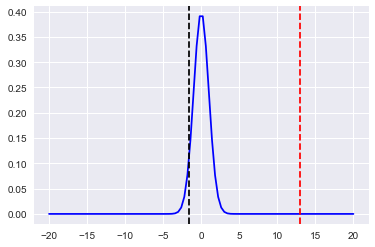

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 20*sigma, mu + 20*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=12.930550455135469,ls='--',color="red")
plt.axvline(x=-1.644,ls='--',color="black")
plt.show()

In [23]:
#Host Response Rate Lower-Tail Wald's Test
supHostDF = superhostDF[superhostDF['host_is_superhost']==1]
x_sup = supHostDF['number_of_bookings'].tolist()
y_sup = superhostDF['number_of_bookings'].tolist()
lowerTailWaldsTest2(x_sup, y_sup)

Single Lower Tail Walds Test
w = 30.375007943612264
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


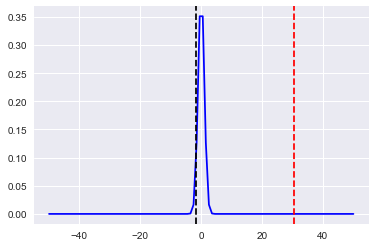

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 50*sigma, mu + 50*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=30.375007943612264,ls='--',color="red")
plt.axvline(x=-1.644,ls='--',color="black")
plt.show()

In [24]:
#Host Response Rate Lower-Tail Wald's Test
idDF = identityDF[identityDF['host_identity_verified']==1]
x_id = idDF['number_of_bookings'].tolist()
y_id = identityDF['number_of_bookings'].tolist()
lowerTailWaldsTest2(x_id, y_id)

Single Lower Tail Walds Test
w = -3.917193688049114
Z0.05 = -1.6448536269514722
Null Hypothesis Rejected


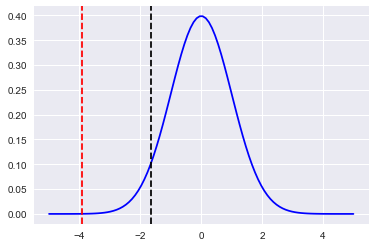

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=-3.917,ls='--',color="red")
plt.axvline(x=-1.644,ls='--',color="black")
plt.show()

In [25]:
#Host Response Rate Lower-Tail Wald's Test
cancDF = cancellationDF[cancellationDF['cancellation_policy']==0]
x_canc = cancDF['number_of_bookings'].tolist()
y_canc = cancellationDF['number_of_bookings'].tolist()
lowerTailWaldsTest2(x_canc, y_canc)

Single Lower Tail Walds Test
w = -10.853467144364368
Z0.05 = -1.6448536269514722
Null Hypothesis Rejected


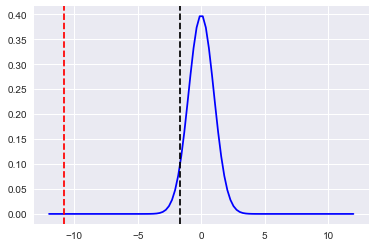

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 12*sigma, mu + 12*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=-10.853,ls='--',color="red")
plt.axvline(x=-1.644,ls='--',color="black")
plt.show()

In [26]:
#Host Response Rate Lower-Tail Wald's Test
bookDF = bookableDF[bookableDF['instant_bookable']==1]
x_book = bookDF['number_of_bookings'].tolist()
y_book = bookableDF['number_of_bookings'].tolist()
lowerTailWaldsTest2(x_book, y_book)

Single Lower Tail Walds Test
w = 48.84468742721555
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


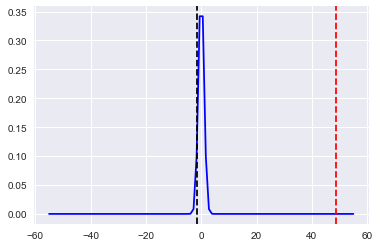

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 55*sigma, mu + 55*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=48.84468742721555,ls='--',color="red")
plt.axvline(x=-1.644,ls='--',color="black")
plt.show()

In [27]:
#finalDF.to_csv('total_bookings.csv', sep=',',index=False)

In [28]:
#Start Applying the Wald's Test Now for each Category

In [29]:
def WaldsTest(X):
    
    #X = X[:501]
    
    p_hat = np.mean(X)
    p_zero = 0.5
    n = len(X)
    
    s_hat = np.sqrt((p_hat*(1-p_hat))/n)
    
    w = np.divide((p_hat - p_zero),s_hat)
    
    
    #alpha = 0.05
    zVal = st.norm.ppf(.975)
    
    lower_ci = p_hat - zVal*s_hat
    upper_ci = p_hat + zVal*s_hat
    
    pVal = 2*st.norm.cdf(-abs(w))
    
    
    #check for hypothesis at alpha = 0.05
    zVal = st.norm.ppf(.975)
    if abs(w)>zVal:
        print("absolute(w) = "+str(abs(w)))
        print("Z0.025 = "+str(zVal))
        print("Null Hypothesis Rejected")
        print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        print("p-Value is "+str(pVal))
    else:
        print("absolute(w) = "+str(abs(w)))
        print("Z0.025 = "+str(zVal))
        print("Null Hypothesis Accepted")
        print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        print("p-Value is "+str(pVal))

In [30]:
def lowerTailWaldsTest(X):
    
    #X = X[:501]
    
    p_hat = np.mean(X)
    p_zero = 0.5
    n = len(X)
    
    s_hat = np.sqrt((p_hat*(1-p_hat))/n)
    
    w = np.divide((p_hat - p_zero),s_hat)
    
    #alpha = 0.05
    zVal = -(st.norm.ppf(.95))
    
    #print(zVal)
    
    #lower_ci = p_hat - zVal*s_hat
    #upper_ci = p_hat + zVal*s_hat
    
    #pVal = 2*st.norm.cdf(-abs(w))

    if w>zVal:
        print("Single Lower Tail Walds Test")
        print("w = "+str(abs(w)))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Accepted")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))
    else:
        print("Single Lower Tail Walds Test")
        print("w = "+str(abs(w)))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Rejected")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))

In [31]:
def upperTailWaldsTest(X):
    
    #X = X[:501]
    
    p_hat = np.mean(X)
    p_zero = 0.5
    n = len(X)
    
    s_hat = np.sqrt((p_hat*(1-p_hat))/n)
    
    w = np.divide((p_hat - p_zero),s_hat)
    
    #alpha = 0.05
    zVal = st.norm.ppf(.95)
    
    #print(zVal)
    
    #lower_ci = p_hat - zVal*s_hat
    #upper_ci = p_hat + zVal*s_hat
    
    #pVal = 2*st.norm.cdf(-abs(w))

    if w>zVal:
        print("Single Upper Tail Walds Test")
        print("w = "+str(abs(w)))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Rejected")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))
    else:
        print("Single Upper Tail Walds Test")
        print("w = "+str(abs(w)))
        print("Z0.05 = "+str(zVal))
        print("Null Hypothesis Accepted")
        #print("CI range: ["+str(lower_ci)+", "+str(upper_ci)+"]")
        #print("p-Value is "+str(pVal))

In [32]:
#Null Hypothesis (H0): host_response_rate does not affect whether a listing gets booked; so p_0 = 0.5
#Alternative Hypothesis (H1): host_response_rate affects whether a listing gets booked
responseRateArray = np.array(finalDF['host_response_rate'].tolist())
WaldsTest(responseRateArray)
lowerTailWaldsTest(responseRateArray)
#upperTailWaldsTest(responseRateArray)

absolute(w) = 307.28164878337435
Z0.025 = 1.959963984540054
Null Hypothesis Rejected
CI range: [0.8084554643782097, 0.8124156259462568]
p-Value is 0.0
Single Lower Tail Walds Test
w = 307.28164878337435
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


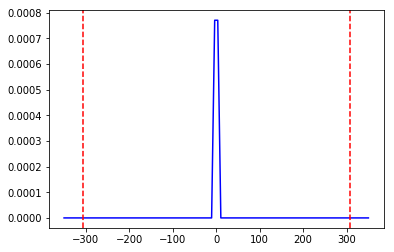

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 350*sigma, mu + 350*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=307.28164878337435,ls='--',color="red")
plt.axvline(x=-307.28164878337435,ls='--',color="red")
plt.show()

In [33]:

#Null Hypothesis (H0): host_is_superhost does not affect whether a listing gets booked; so p_0 = 0.5
#Alternative Hypothesis (H1): host_is_superhost affects whether a listing gets booked
hostSuperHostArray =np.array(finalDF['host_is_superhost'].tolist())
WaldsTest(hostSuperHostArray)
lowerTailWaldsTest(hostSuperHostArray)
#upperTailWaldsTest(hostSuperHostArray)

absolute(w) = 267.20166717913554
Z0.025 = 1.959963984540054
Null Hypothesis Rejected
CI range: [0.21431711775855153, 0.2184776525106414]
p-Value is 0.0
Single Lower Tail Walds Test
w = 267.20166717913554
Z0.05 = -1.6448536269514722
Null Hypothesis Rejected


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


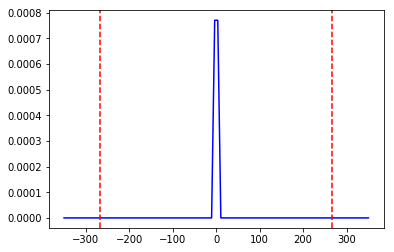

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 350*sigma, mu + 350*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=267.20166717913554,ls='--',color="red")
plt.axvline(x=-267.20166717913554,ls='--',color="red")
plt.show()

In [34]:
#Null Hypothesis (H0): host_identity_verified does not affect whether a listing gets booked; so p_0 = 0.5
#Alternative Hypothesis (H1): host_identity_verified affects whether a listing gets booked
hostIdentityVerifiedArray =np.array(finalDF['host_identity_verified'].tolist())
WaldsTest(hostIdentityVerifiedArray)
lowerTailWaldsTest(hostIdentityVerifiedArray)
#upperTailWaldsTest(hostIdentityVerifiedArray)

absolute(w) = 177.33969827240017
Z0.025 = 1.959963984540054
Null Hypothesis Rejected
CI range: [0.7055632592083083, 0.7101578218153157]
p-Value is 0.0
Single Lower Tail Walds Test
w = 177.33969827240017
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


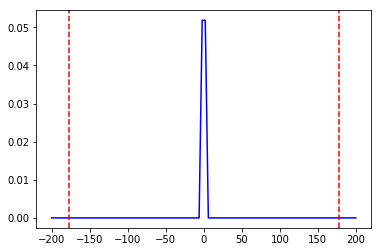

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 200*sigma, mu + 200*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=177.33969827240017,ls='--',color="red")
plt.axvline(x=-177.33969827240017,ls='--',color="red")
plt.show()

In [35]:
#Null Hypothesis (H0): cancellation_policy does not affect whether a listing gets booked; so p_0 = 0.5
#Alternative Hypothesis (H1): cancellation_policy affects whether a listing gets booked
cancellationPolicyArray =np.array(finalDF['cancellation_policy'].tolist())
WaldsTest(cancellationPolicyArray)
lowerTailWaldsTest(cancellationPolicyArray)
#upperTailWaldsTest(cancellationPolicyArray)

absolute(w) = 62.98830097903346
Z0.025 = 1.959963984540054
Null Hypothesis Rejected
CI range: [0.5776335075618556, 0.5826200068278763]
p-Value is 0.0
Single Lower Tail Walds Test
w = 62.98830097903346
Z0.05 = -1.6448536269514722
Null Hypothesis Accepted


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


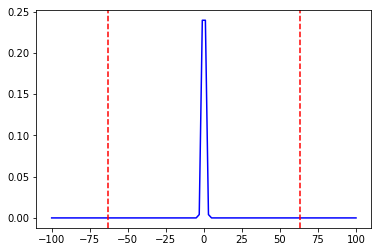

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 100*sigma, mu + 100*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=62.98830097903346,ls='--',color="red")
plt.axvline(x=-62.98830097903346,ls='--',color="red")
plt.show()

In [36]:
#Null Hypothesis (H0): instant_bookable does not affect whether a listing gets booked; so p_0 = 0.5
#Alternative Hypothesis (H1): instant_bookable affects whether a listing gets booked
instantBookableArray =np.array(finalDF['instant_bookable'].tolist())
WaldsTest(instantBookableArray)
lowerTailWaldsTest(instantBookableArray)
#upperTailWaldsTest(instantBookableArray)

absolute(w) = 144.57924176196713
Z0.025 = 1.959963984540054
Null Hypothesis Rejected
CI range: [0.3230363668130685, 0.327770149091372]
p-Value is 0.0
Single Lower Tail Walds Test
w = 144.57924176196713
Z0.05 = -1.6448536269514722
Null Hypothesis Rejected


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


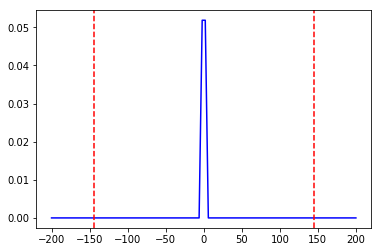

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 200*sigma, mu + 200*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),color="blue")
plt.axvline(x=144.57924176196713,ls='--',color="red")
plt.axvline(x=-144.57924176196713,ls='--',color="red")
plt.show()